## Problem 3. Zipf의 법칙을 확인할 수 있는 python 코드를 작성하시오.

### 3-1. 주어진 텍스트(bible.txt)로부터 각 단어의 등장 빈도를 count하여 Zipf의 법칙이 성립하는지 확인할 수 있는 python 코드를 작성하시오. 결과로 Zipf의 법칙을 보여줄 수 있는 결과를 출력하시오.

bible.txt의 크기가 매우 크므로, 비교적 작은 테스트 케이스를 만들어서 테스트하는 식으로 문제를 풀었습니다.

우선 3-1에서 사용할 모듈들을 임포트합니다.

In [54]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

우선 각 단어의 등장횟수를 세는 함수 `count_words`를 정의합니다. `count_words` 함수는 `numpy` 모듈의 `unique`함수를 이용해서 unique한 단어의 개수를 셉니다.

In [37]:
def count_words(words: list) -> dict:
    word_unique, word_count = np.unique(np.array(words), return_counts=True)
    return dict(zip(word_unique, word_count))

In [38]:
example1 = ['the', 'a', 'some', 'a', 'some', 'the', 'abc', '123', 'the']
print(count_words(example1))

{'123': 1, 'some': 2, 'the': 3, 'abc': 1, 'a': 2}


그리고 각 단어별 등장횟수로 단어를 정렬하는 함수 `sort_words_by_frequency`를 정의합니다. 정렬을 기본 함수인 `sorted`를 이용해서 하고, 정렬된 list에서 키값만 뽑아내기 위해서 `map` 함수를 사용했습니다.

In [39]:
def sort_words_by_frequency(word_count_dict: list) -> list:
    word_rank_pair_list = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)
    return list(map(lambda x: x[0], word_rank_pair_list))

In [40]:
example2 = {'123': 1, 'a': 2, 'abc': 1, 'some': 2, 'the': 3}
print(sort_words_by_frequency(example2))

['the', 'some', 'a', '123', 'abc']


`calculate_freq_and_rank_of_words` 함수는 주어진 단어들의 `freq_list`와 `rank_list`를 계산하여 리턴합니다. `word_count_dict`를 순회하면서 freq를 체크하는 식으로 구현하였습니다. 이때 만약 등장횟수가 같은 단어가 여러개 있다면 이들의 rank는 최소값을 사용합니다. 이전 단어의 등장횟수와 현재 단어의 등장횟수를 `freq_list[i - 1] == freq`로 비교하여 같으면 `rank`를 그대로 유지하는 방법으로 rank가 최소값이 되도록 했습니다.

In [41]:
def calculate_freq_and_rank_of_words(word_rank_list: list, word_count_dict: dict) -> (list, list):
    freq_list = []
    rank_list = []

    rank = 1 # 현재 rank 값.
    for i in range(len(word_count_dict)):
        word = word_rank_list[i]
        freq = word_count_dict[word]
        # freq가 같은 경우 rank도 같아야 하지만 현재 word_rank_list의 index는 1씩 증가하며 모두 다른 값을 가지므로
        # 바로 rank = i + 1을 적용할 수 없음
        # 만약 이전 rank의 단어가 현재 단어와 동일한 freq를 같는다면, 이전 rank를 그대로 유지한다.
        if i > 0 and freq_list[i - 1] == freq:
            pass
        else:
            rank = i + 1

        freq_list.append(freq)
        rank_list.append(rank)
        
    return (freq_list, rank_list)

In [42]:
example3 = ['the', 'a', 'some', 'a', 'some', 'the', 'abc', '123', 'the']
example3_word_count_dict = count_words(example3)
example3_word_rank_list = sort_words_by_frequency(example3_word_count_dict)
print(example3_word_rank_list)
print(calculate_freq_and_rank_of_words(example3_word_rank_list, example3_word_count_dict))

['the', 'some', 'a', '123', 'abc']
([3, 2, 2, 1, 1], [1, 2, 2, 4, 4])


Zipf's law는 input으로 word의 리스트를 받아서, `freq_list`와 `rank_list`를 리턴하는 함수이므로 아래와 같이 구성할 수 있습니다.

In [43]:
def zipf_law(words: list) -> (list, list):
    word_count_dict = count_words(words)
    word_rank_list = sort_words_by_frequency(word_count_dict)
    return calculate_freq_and_rank_of_words(word_rank_list, word_count_dict)

In [44]:
example4 = ['the', 'a', 'some', 'a', 'some', 'the', 'abc', '123', 'the']
print(zipf_law(example4))

([3, 2, 2, 1, 1], [1, 2, 2, 4, 4])


`zipf_law`를 적용할 데이터셋을 준비합니다. `bible.txt`를 읽어서 문장부호 등을 제거한 후 `nltk` 모듈의 `word_tokenizer`를 사용해서 tokenize합니다.

In [45]:
with open("../assets/bible.txt", 'r') as f:
    text = f.read()
s_list = ['.', ',', '?', '!', ';', ':', '\'s', '(', ')', '“', '”', '’', '=', '>',
          '+', '<', '&', '#', '·', '&', '←']
for c in s_list:
    text = text.replace(c, '')
# 소문자로 변환
text = text.lower()
tokenized_words = word_tokenize(text)           # 다른 tokenizer 사용 가능

준비된 데이터셋 `tokenized_words`에 `zipf_law` 함수를 적용하여, 각 단어별 rank와 freq를 얻습니다.

In [46]:
freq_list, rank_list = zipf_law(tokenized_words)

이것을 `numpy` 모듈의 `log` 함수를 이용하여, log scale로 변환한 후 플롯팅을 해줍니다.

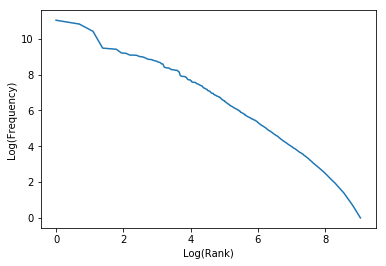

In [51]:
freq_list, rank_list = zipf_law(tokenized_words)
plt.plot(np.log(rank_list), np.log(freq_list), label='Unigram')

plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.show()

### 3-2. NLTK에서 제공하는 Bigram, Trigram을 이용하여 Zipf의 법칙이 성립하는지 확인해보고 3-1의 결과(Unigram), Bigram, Trigram 의 결과를 차트를 통해 비교하시오. (print 결과 출력 X)

bigram과 trigram은 `nltk` 모듈의 `bigram` 함수와 `trigram` 함수를 이용해서 아래와 같이 얻을 수 있습니다.

In [52]:
bigram_list = list(nltk.bigrams(tokenized_words))
trigram_list = list(nltk.trigrams(tokenized_words))

얻어진 bigram과 trigram도 위에서 unigram을 플롯팅한 것과 동일하게 log scale로 변환해서 플롯팅을 해줍니다.

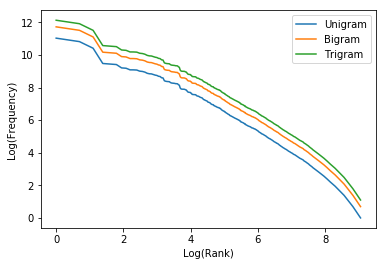

In [53]:
plt.plot(np.log(rank_list), np.log(freq_list), label='Unigram')
bigram_freq_list, bigram_rank_list = zipf_law(bigram_list)
plt.plot(np.log(bigram_rank_list), np.log(bigram_freq_list), label='Bigram')
trigram_freq_list, trigram_rank_list = zipf_law(trigram_list)
plt.plot(np.log(trigram_rank_list), np.log(trigram_freq_list), label='Trigram')

plt.legend()
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.show()

플롯팅 결과 unigram에 비해서 bigram과 trigram이 Y축(Log of frequency)에서 양의 방향으로 이동한 것을 알 수 있었습니다.